In [119]:
from orbits.sim import SimRun
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()
from matplotlib import pyplot as plt
from astroquery.jplhorizons import Horizons
from astropy.time import Time
import numpy as np

In [2]:
sun = Horizons(id='sun', location="@SSB", epochs=Time("2023-01-01").jd, id_type=None).vectors()

In [3]:
earth = Horizons(id='399', location="@SSB", epochs=Time("2023-01-01").jd, id_type=None).vectors()

In [4]:
jupiter = Horizons(id='599', location="@SSB", epochs=Time("2023-01-01").jd, id_type=None).vectors()

In [5]:
run1 = SimRun(0.1*u.d,12*u.year)

In [6]:
run1.add_object('Sun', sun['x'].quantity[0], sun['y'].quantity[0], sun['z'].quantity[0], sun['vx'].quantity[0], sun['vy'].quantity[0], sun['vz'].quantity[0], 1.98840987e+30*u.kg, 695508*u.au)
run1.add_object('Earth', earth['x'].quantity[0], earth['y'].quantity[0], earth['z'].quantity[0], earth['vx'].quantity[0], earth['vy'].quantity[0], earth['vz'].quantity[0], 5.97216787e+24*u.kg, 6.371e+6*u.au)
run1.add_object('Jupiter', jupiter['x'].quantity[0], jupiter['y'].quantity[0], jupiter['z'].quantity[0], jupiter['vx'].quantity[0], jupiter['vy'].quantity[0], jupiter['vz'].quantity[0],1.898187e+27*u.kg, 6.9911e+7*u.au)

In [7]:
run1.run()

In [8]:
run1.objects[1]

{'name': 'Earth',
 'mass': <Quantity 5.97216787e+24 kg>,
 'radius': <Quantity 9.53088034e+17 m>,
 'pvt': <Quantity [([-2.68245610e+10,  1.44897570e+11,  2.41300112e+07], [-2.98148235e+04, -5.29591892e+03, -5.49370075e-01], 0.0000000e+00),
            ([-2.70821610e+10,  1.44851814e+11,  2.41252646e+07], [-2.98056473e+04, -5.34810571e+03, -5.46781003e-01], 8.6400000e+03),
            ([-2.73396818e+10,  1.44805606e+11,  2.41205404e+07], [-2.97963783e+04, -5.40027617e+03, -5.44189897e-01], 1.7280000e+04),
            ...,
            ([-1.65334940e+11, -7.94539648e+10,  6.81712754e+07], [ 1.11668230e+04, -2.46539879e+04,  1.80660546e+00], 3.7867392e+08),
            ([-1.65238459e+11, -7.96669752e+10,  6.81868845e+07], [ 1.11982742e+04, -2.46389182e+04,  1.80670080e+00], 3.7868256e+08),
            ([-1.65141706e+11, -7.98798555e+10,  6.82024944e+07], [ 1.12297042e+04, -2.46238088e+04,  1.80679324e+00], 3.7869120e+08)] (m, m / s, s)>}

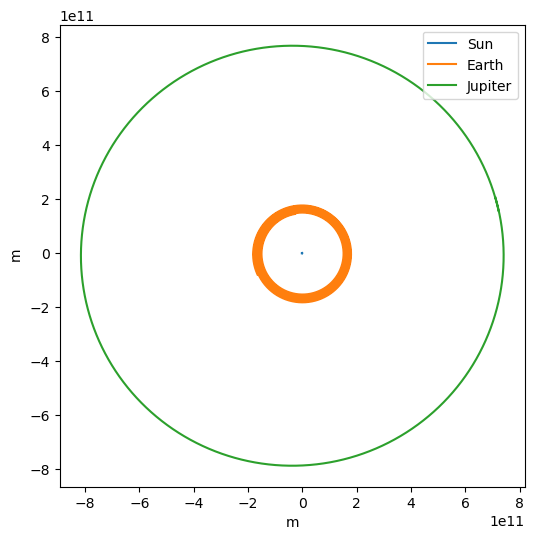

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
for o in run1.objects:
    ax.plot(o['pvt']['p'][:,0],o['pvt']['p'][:,1],label=o['name'])

ax.legend()

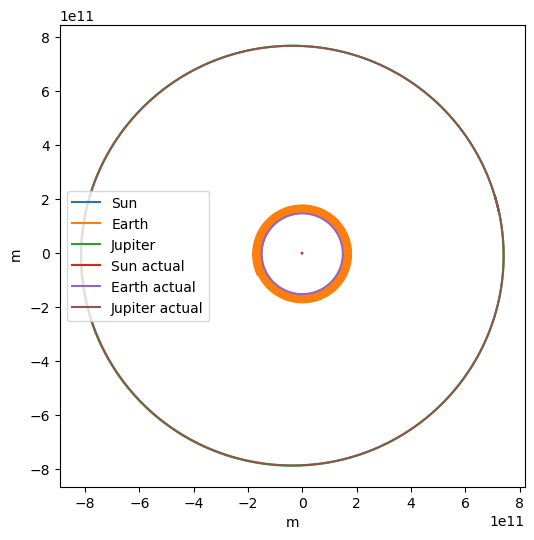

In [10]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2023-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
y1 = sun['y'].quantity
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2023-12-31",'step':'1d'}, id_type=None).vectors()
x2 = earth['x'].quantity
y2 = earth['y'].quantity
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
x3 = jupiter['x'].quantity
y3 = jupiter['y'].quantity
fig, ax = plt.subplots(figsize=(6, 6))
for o in run1.objects:
    ax.plot(o['pvt']['p'][:,0],o['pvt']['p'][:,1],label=o['name'])
ax.plot(x1, y1, label='Sun actual')
ax.plot(x2, y2, label='Earth actual') 
ax.plot(x3, y3, label='Jupiter actual')
ax.legend()

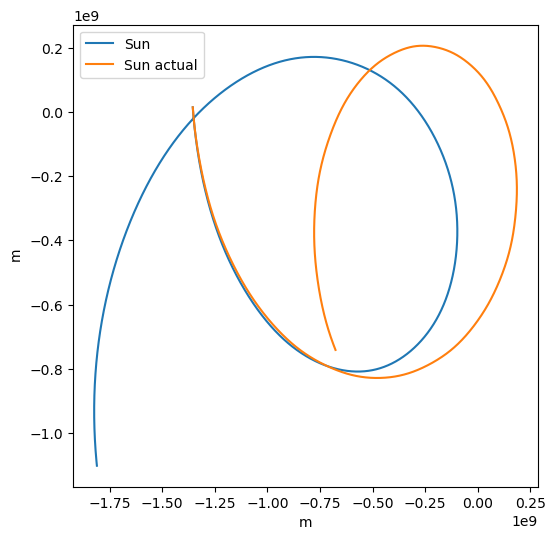

In [11]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
y1 = sun['y'].quantity
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(run1.objects[0]['pvt']['p'][:,0],run1.objects[0]['pvt']['p'][:,1],label=run1.objects[0]['name'])
ax.plot(x1, y1, label='Sun actual')
ax.legend()

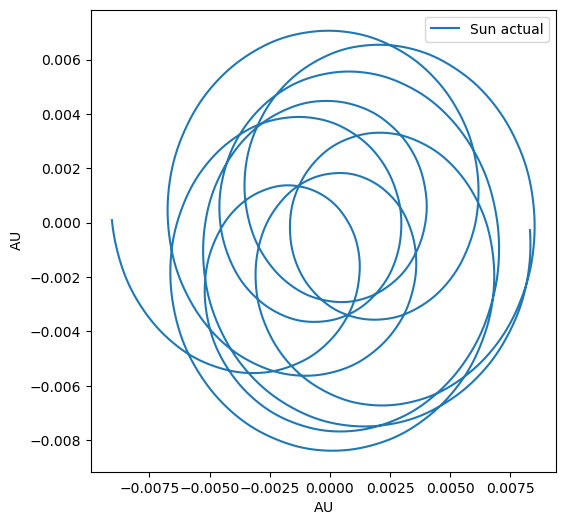

In [12]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2123-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
y1 = sun['y'].quantity
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x1, y1, label='Sun actual')
ax.legend()
# Sun's orbit over 100 years, because I was curious.

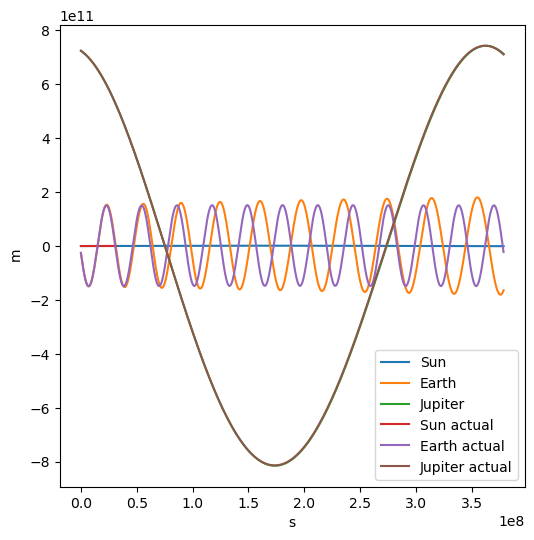

In [13]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2023-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
x2 = earth['x'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
x3 = jupiter['x'].quantity
t3 = jupiter['datetime_jd'].quantity - jupiter['datetime_jd'].quantity[0]
fig, ax = plt.subplots(figsize=(6, 6))
for o in run1.objects:
    ax.plot(o['pvt']['t'],o['pvt']['p'][:,0],label=o['name'])
ax.plot(t1, x1, label='Sun actual')
ax.plot(t2, x2, label='Earth actual') 
ax.plot(t3, x3, label='Jupiter actual')
ax.legend()

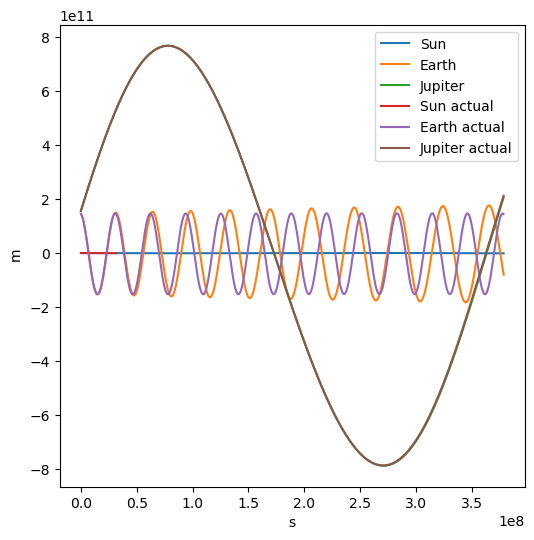

In [14]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2023-12-31",'step':'1d'}, id_type=None).vectors()
y1 = sun['y'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
y2 = earth['y'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
y3 = jupiter['y'].quantity
t3 = jupiter['datetime_jd'].quantity - jupiter['datetime_jd'].quantity[0]
fig, ax = plt.subplots(figsize=(6, 6))
for o in run1.objects:
    ax.plot(o['pvt']['t'],o['pvt']['p'][:,1],label=o['name'])
ax.plot(t1, y1, label='Sun actual')
ax.plot(t2, y2, label='Earth actual') 
ax.plot(t3, y3, label='Jupiter actual')
ax.legend()

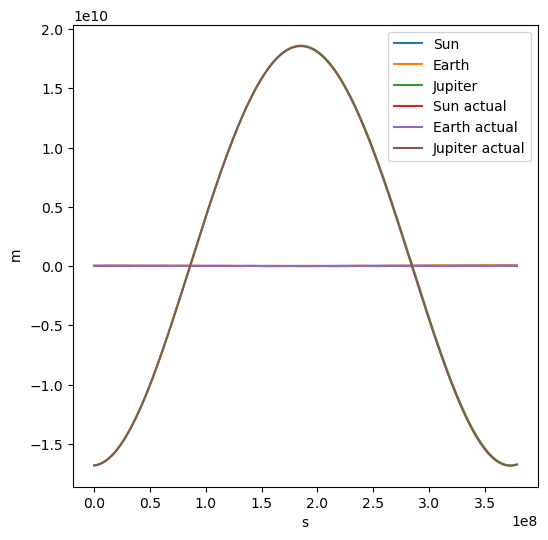

In [15]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2023-12-31",'step':'1d'}, id_type=None).vectors()
z1 = sun['z'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
z2 = earth['z'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31", 'step':'1d'}, id_type=None).vectors()
z3 = jupiter['z'].quantity
t3 = jupiter['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
fig, ax = plt.subplots(figsize=(6, 6))
for o in run1.objects:
    ax.plot(o['pvt']['t'],o['pvt']['p'][:,2],label=o['name'])
ax.plot(t1, z1, label='Sun actual')
ax.plot(t2, z2, label='Earth actual') 
ax.plot(t3, z3, label='Jupiter actual')
ax.legend()

In [16]:
# Fun with integer math:
print(f"Integer division: 5//3 = {5//3}")
print(f"Remainder/mod: 5%3 = {5%3}")
import math
print(f"Rounding up: 5/3 = {math.ceil(5/3)}")

Integer division: 5//3 = 1
Remainder/mod: 5%3 = 2
Rounding up: 5/3 = 2


In [17]:
# Advanced Looping:
# Looping over two things at once
x = [3,5,7]
y = ['a','b','c']
for a, b in zip(x,y):
    print(f" a={a}, b={b}")

# numbering what you're looping over
x = ['Ted','Beard','Roy','Nate']
for i, c in enumerate(x):
    print(f" Coach #{i}: {c}")

# Putting it all together it might look like this:
sim = ['Sun', 'Earth', 'Jupiter']
real = []
real.append('Real Sun')
real.append('Real Earth')
real.append('Real Jupiter')
for i, (s, r) in enumerate(zip(sim,real)):
    print(f"Entry #{i}: sim = {s}, real={r}")

 a=3, b=a
 a=5, b=b
 a=7, b=c
 Coach #0: Ted
 Coach #1: Beard
 Coach #2: Roy
 Coach #3: Nate
Entry #0: sim = Sun, real=Real Sun
Entry #1: sim = Earth, real=Real Earth
Entry #2: sim = Jupiter, real=Real Jupiter


In [18]:
sun['targetname'][0].split(' ')[0]+' (Actual)'

'Sun (Actual)'

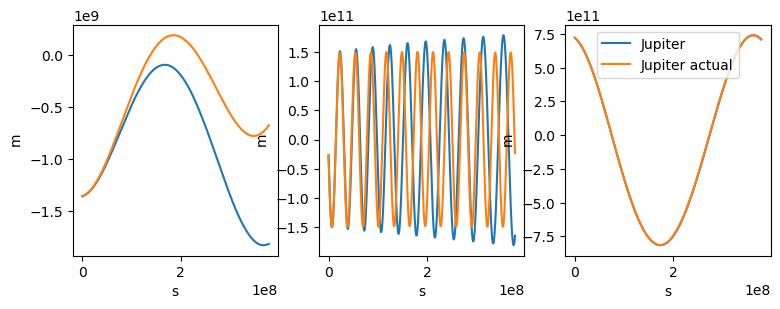

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(9,3))
plt.subplot(131)
plt.plot(run1.objects[0]['pvt']['t'],run1.objects[0]['pvt']['p'][:,0],label=run1.objects[0]['name'])
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
plt.plot(t1, x1, label='Sun actual')
plt.subplot(132)
plt.plot(run1.objects[1]['pvt']['t'],run1.objects[1]['pvt']['p'][:,0],label=run1.objects[1]['name'])
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
x2 = earth['x'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t2, x2, label='Earth actual')
plt.subplot(133)
plt.plot(run1.objects[2]['pvt']['t'],run1.objects[2]['pvt']['p'][:,0],label=run1.objects[2]['name'])
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
x3 = jupiter['x'].quantity
t3 = jupiter['datetime_jd'].quantity - jupiter['datetime_jd'].quantity[0]
plt.plot(t3, x3, label='Jupiter actual')
plt.legend()
# Orange is actual data from Horizons, blue is the simulation
# From left to right: Sun, Earth, Jupiter

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

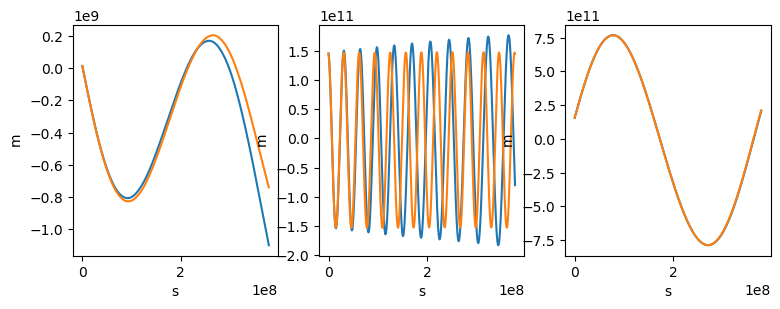

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(9,3))
plt.subplot(131)
plt.plot(run1.objects[0]['pvt']['t'],run1.objects[0]['pvt']['p'][:,1],label=run1.objects[0]['name'])
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
y1 = sun['y'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
plt.plot(t1, y1, label='Sun actual')
plt.subplot(132)
plt.plot(run1.objects[1]['pvt']['t'],run1.objects[1]['pvt']['p'][:,1],label=run1.objects[1]['name'])
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
y2 = earth['y'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t2, y2, label='Earth actual')
plt.subplot(133)
plt.plot(run1.objects[2]['pvt']['t'],run1.objects[2]['pvt']['p'][:,1],label=run1.objects[2]['name'])
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
y3 = jupiter['y'].quantity
t3 = jupiter['datetime_jd'].quantity - jupiter['datetime_jd'].quantity[0]
plt.plot(t3, y3, label='Jupiter actual')
plt.legend
# Orange is actual data from Horizons, blue is the simulation
# From left to right: Sun, Earth, Jupiter

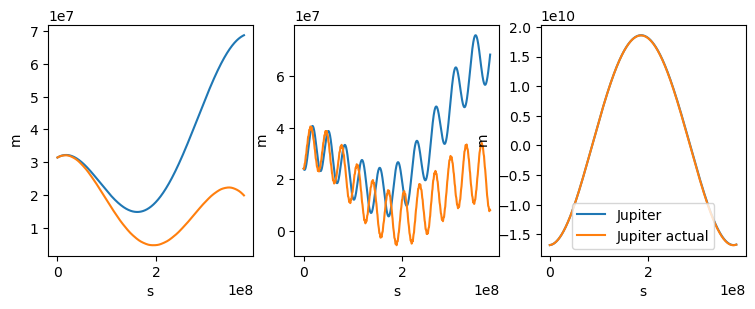

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(9,3))
plt.subplot(131)
plt.plot(run1.objects[0]['pvt']['t'],run1.objects[0]['pvt']['p'][:,2],label=run1.objects[0]['name'])
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
z1 = sun['z'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
plt.plot(t1, z1, label='Sun actual')
plt.subplot(132)
plt.plot(run1.objects[1]['pvt']['t'],run1.objects[1]['pvt']['p'][:,2],label=run1.objects[1]['name'])
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
z2 = earth['z'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t2, z2, label='Earth actual')
plt.subplot(133)
plt.plot(run1.objects[2]['pvt']['t'],run1.objects[2]['pvt']['p'][:,2],label=run1.objects[2]['name'])
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
z3 = jupiter['z'].quantity
t3 = jupiter['datetime_jd'].quantity - jupiter['datetime_jd'].quantity[0]
plt.plot(t3, z3, label='Jupiter actual')
plt.legend()
# Orange is actual data from Horizons, blue is the simulation
# From left to right: Sun, Earth, Jupiter

In [22]:
saturn = Horizons(id='699', location="@SSB", epochs=Time("2023-01-01").jd, id_type=None).vectors()

In [23]:
run2 = SimRun(0.1*u.d,30*u.year)

In [99]:
run2.add_object('Sun', sun['x'].quantity[0], sun['y'].quantity[0], sun['z'].quantity[0], sun['vx'].quantity[0], sun['vy'].quantity[0], sun['vz'].quantity[0], 1.98840987e+30*u.kg, 695508*u.au)
run2.add_object('Earth', earth['x'].quantity[0], earth['y'].quantity[0], earth['z'].quantity[0], earth['vx'].quantity[0], earth['vy'].quantity[0], earth['vz'].quantity[0], 5.97216787e+24*u.kg, 6.371e+6*u.au)
run2.add_object('Jupiter', jupiter['x'].quantity[0], jupiter['y'].quantity[0], jupiter['z'].quantity[0], jupiter['vx'].quantity[0], jupiter['vy'].quantity[0], jupiter['vz'].quantity[0],1.898187e+27*u.kg, 6.9911e+7*u.au)
run2.add_object('Saturn', saturn['x'].quantity[0], saturn['y'].quantity[0], saturn['z'].quantity[0], saturn['vx'].quantity[0], saturn['vy'].quantity[0], saturn['vz'].quantity[0], 5.68317e+26*u.kg, 5.8232e+7*u.au)

In [25]:
run2.run()

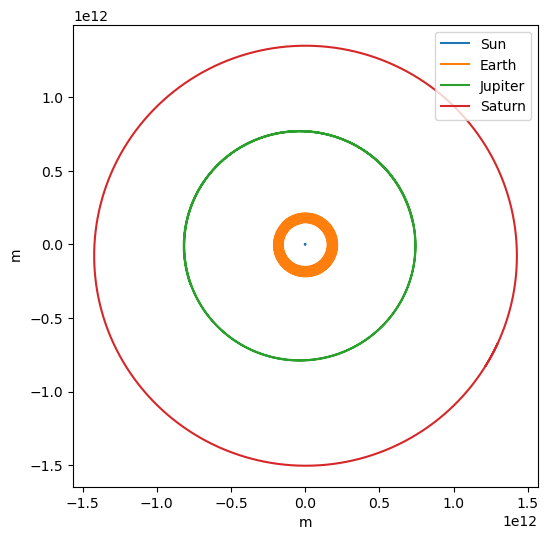

In [26]:
fig, ax = plt.subplots(figsize=(6, 6))
for o in run2.objects:
    ax.plot(o['pvt']['p'][:,0],o['pvt']['p'][:,1],label=o['name'])

ax.legend()

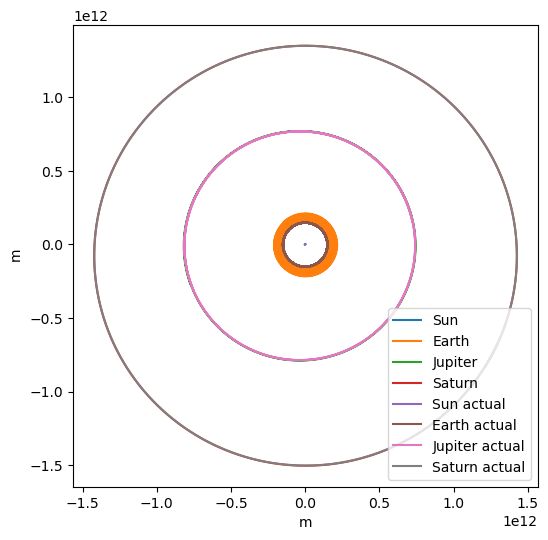

In [30]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
y1 = sun['y'].quantity
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x2 = earth['x'].quantity
y2 = earth['y'].quantity
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x3 = jupiter['x'].quantity
y3 = jupiter['y'].quantity
saturn = Horizons(id='699', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x4 = saturn['x'].quantity
y4 = saturn['y'].quantity
fig, ax = plt.subplots(figsize=(6, 6))
for o in run2.objects:
    ax.plot(o['pvt']['p'][:,0],o['pvt']['p'][:,1],label=o['name'])
ax.plot(x1, y1, label='Sun actual')
ax.plot(x2, y2, label='Earth actual') 
ax.plot(x3, y3, label='Jupiter actual')
ax.plot(x4, y4, label='Saturn actual')
ax.legend()

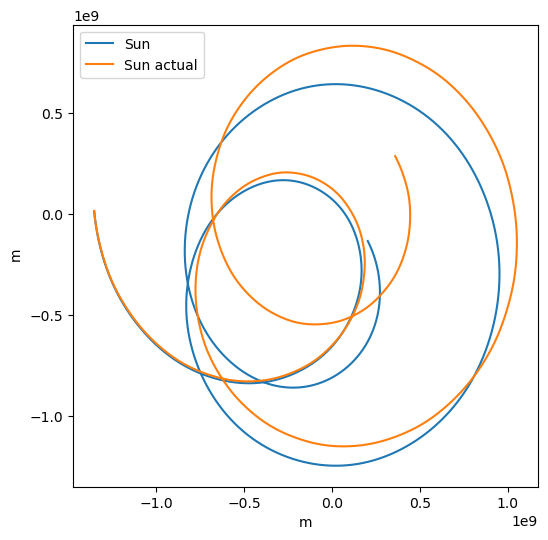

In [32]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
y1 = sun['y'].quantity
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(run2.objects[0]['pvt']['p'][:,0],run2.objects[0]['pvt']['p'][:,1],label=run2.objects[0]['name'])
ax.plot(x1, y1, label='Sun actual')
ax.legend()

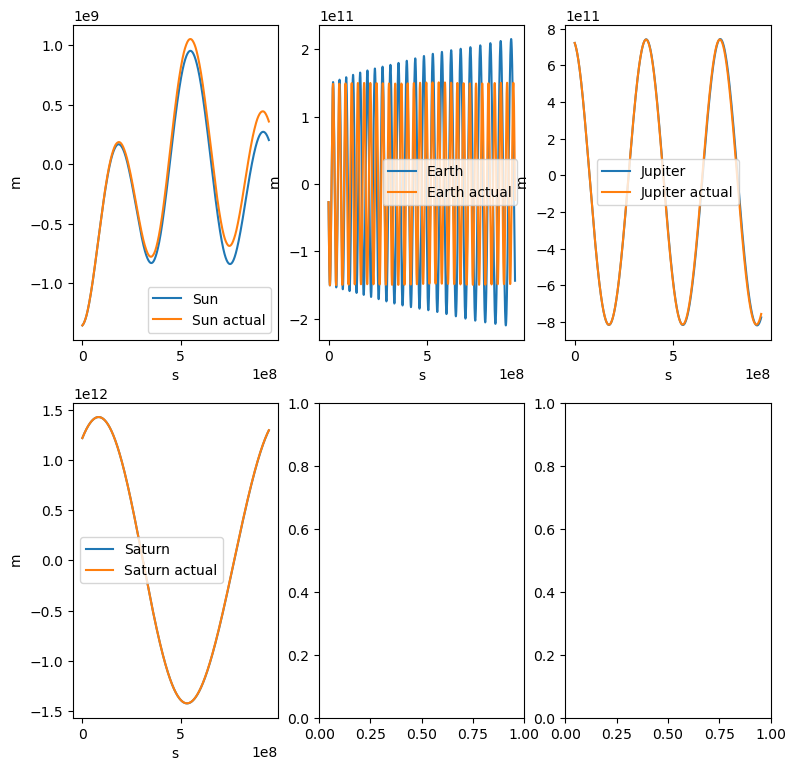

In [44]:
fig, ax = plt.subplots(2, 3, figsize=(9,9))
plt.subplot(231)
plt.plot(run2.objects[0]['pvt']['t'],run2.objects[0]['pvt']['p'][:,0],label=run2.objects[0]['name'])
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
plt.plot(t1, x1, label='Sun actual')
plt.legend()
plt.subplot(232)
plt.plot(run2.objects[1]['pvt']['t'],run2.objects[1]['pvt']['p'][:,0],label=run2.objects[1]['name'])
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x2 = earth['x'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t2, x2, label='Earth actual')
plt.legend()
plt.subplot(233)
plt.plot(run2.objects[2]['pvt']['t'],run2.objects[2]['pvt']['p'][:,0],label=run2.objects[2]['name'])
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x3 = jupiter['x'].quantity
t3 = jupiter['datetime_jd'].quantity - jupiter['datetime_jd'].quantity[0]
plt.plot(t3, x3, label='Jupiter actual')
plt.legend()
plt.subplot(234)
plt.plot(run2.objects[3]['pvt']['t'],run2.objects[3]['pvt']['p'][:,0],label=run2.objects[3]['name'])
saturn = Horizons(id='699', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x4 = saturn['x'].quantity
t4 = saturn['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t4, x4, label='Saturn actual')
plt.legend()

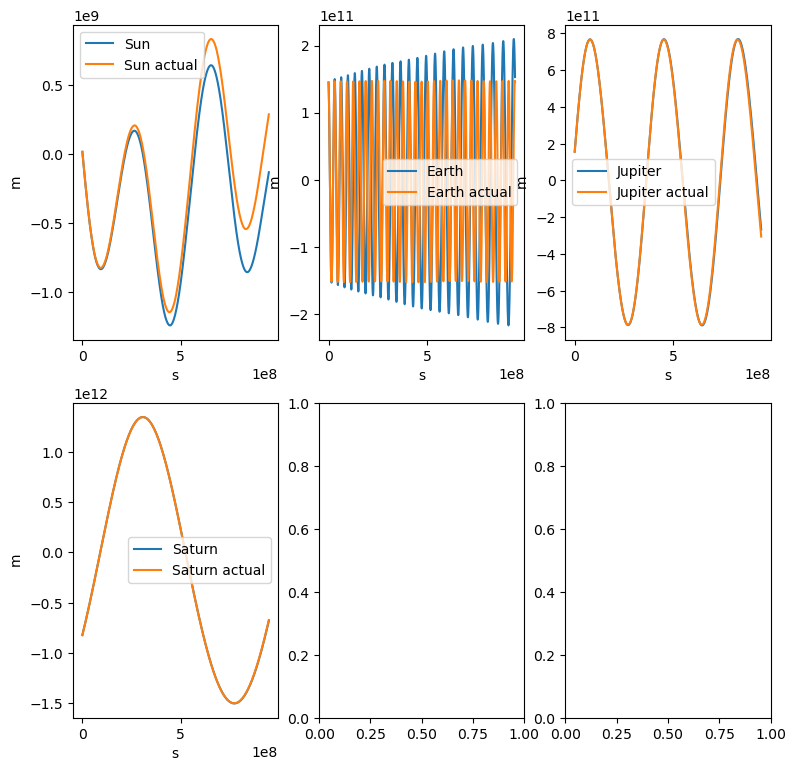

In [45]:
fig, ax = plt.subplots(2, 3, figsize=(9,9))
plt.subplot(231)
plt.plot(run2.objects[0]['pvt']['t'],run2.objects[0]['pvt']['p'][:,1],label=run2.objects[0]['name'])
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y1 = sun['y'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
plt.plot(t1, y1, label='Sun actual')
plt.legend()
plt.subplot(232)
plt.plot(run2.objects[1]['pvt']['t'],run2.objects[1]['pvt']['p'][:,1],label=run2.objects[1]['name'])
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y2 = earth['y'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t2, y2, label='Earth actual')
plt.legend()
plt.subplot(233)
plt.plot(run2.objects[2]['pvt']['t'],run2.objects[2]['pvt']['p'][:,1],label=run2.objects[2]['name'])
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y3 = jupiter['y'].quantity
t3 = jupiter['datetime_jd'].quantity - jupiter['datetime_jd'].quantity[0]
plt.plot(t3, y3, label='Jupiter actual')
plt.legend()
plt.subplot(234)
plt.plot(run2.objects[3]['pvt']['t'],run2.objects[3]['pvt']['p'][:,1],label=run2.objects[3]['name'])
saturn = Horizons(id='699', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y4 = saturn['y'].quantity
t4 = saturn['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t4, y4, label='Saturn actual')
plt.legend()

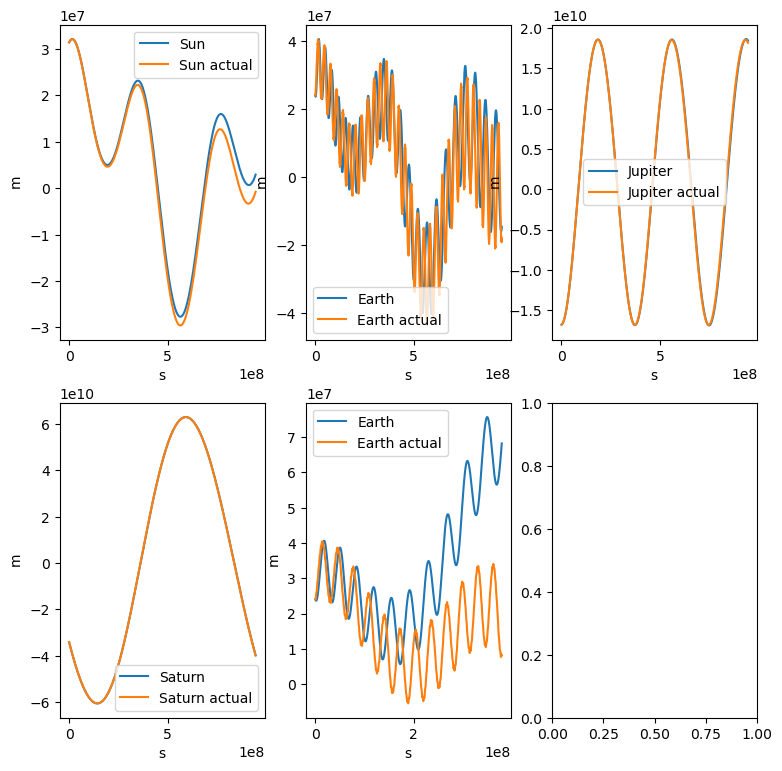

In [47]:
fig, ax = plt.subplots(2, 3, figsize=(9,9))
plt.subplot(231)
plt.plot(run2.objects[0]['pvt']['t'],run2.objects[0]['pvt']['p'][:,2],label=run2.objects[0]['name'])
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z1 = sun['z'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
plt.plot(t1, z1, label='Sun actual')
plt.legend()
plt.subplot(232)
plt.plot(run2.objects[1]['pvt']['t'],run2.objects[1]['pvt']['p'][:,2],label=run2.objects[1]['name'])
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z2 = earth['z'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t2, z2, label='Earth actual')
plt.legend()
plt.subplot(233)
plt.plot(run2.objects[2]['pvt']['t'],run2.objects[2]['pvt']['p'][:,2],label=run2.objects[2]['name'])
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z3 = jupiter['z'].quantity
t3 = jupiter['datetime_jd'].quantity - jupiter['datetime_jd'].quantity[0]
plt.plot(t3, z3, label='Jupiter actual')
plt.legend()
plt.subplot(234)
plt.plot(run2.objects[3]['pvt']['t'],run2.objects[3]['pvt']['p'][:,2],label=run2.objects[3]['name'])
saturn = Horizons(id='699', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z4 = saturn['z'].quantity
t4 = saturn['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t4, z4, label='Saturn actual')
plt.legend()
plt.subplot(235)
plt.plot(run1.objects[1]['pvt']['t'],run1.objects[1]['pvt']['p'][:,2],label=run1.objects[1]['name'])
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2034-12-31",'step':'1d'}, id_type=None).vectors()
z2 = earth['z'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t2, z2, label='Earth actual')
plt.legend()

In [63]:
mars = Horizons(id='499', location="@SSB", epochs=Time("2023-01-01").jd, id_type=None).vectors()

In [64]:
run3 = SimRun(0.1*u.d,30*u.year)

In [65]:
run3.add_object('Sun', sun['x'].quantity[0], sun['y'].quantity[0], sun['z'].quantity[0], sun['vx'].quantity[0], sun['vy'].quantity[0], sun['vz'].quantity[0], 1.98840987e+30*u.kg, 695508*u.au)
run3.add_object('Earth', earth['x'].quantity[0], earth['y'].quantity[0], earth['z'].quantity[0], earth['vx'].quantity[0], earth['vy'].quantity[0], earth['vz'].quantity[0], 5.97216787e+24*u.kg, 6.371e+6*u.au)
run3.add_object('Mars', mars['x'].quantity[0], mars['y'].quantity[0], mars['z'].quantity[0], mars['vx'].quantity[0], mars['vy'].quantity[0], mars['vz'].quantity[0], 6.4171e+23*u.kg, 3.3895e+6*u.au)
run3.add_object('Jupiter', jupiter['x'].quantity[0], jupiter['y'].quantity[0], jupiter['z'].quantity[0], jupiter['vx'].quantity[0], jupiter['vy'].quantity[0], jupiter['vz'].quantity[0],1.898187e+27*u.kg, 6.9911e+7*u.au)
run3.add_object('Saturn', saturn['x'].quantity[0], saturn['y'].quantity[0], saturn['z'].quantity[0], saturn['vx'].quantity[0], saturn['vy'].quantity[0], saturn['vz'].quantity[0], 5.68317e+26*u.kg, 5.8232e+7*u.au)

In [66]:
run3.run()

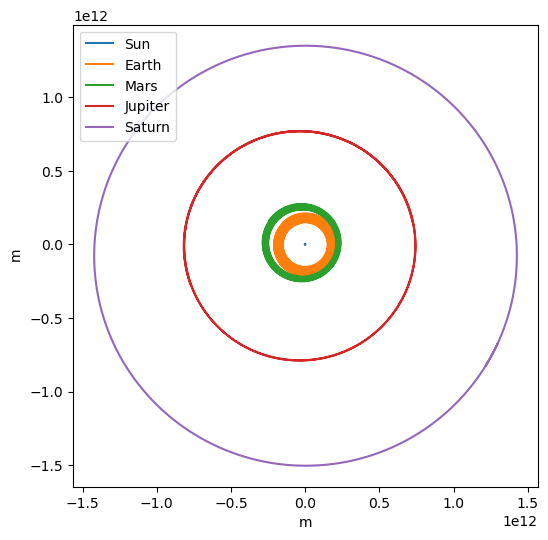

In [67]:
fig, ax = plt.subplots(figsize=(6, 6))
for o in run3.objects:
    ax.plot(o['pvt']['p'][:,0],o['pvt']['p'][:,1],label=o['name'])

ax.legend()

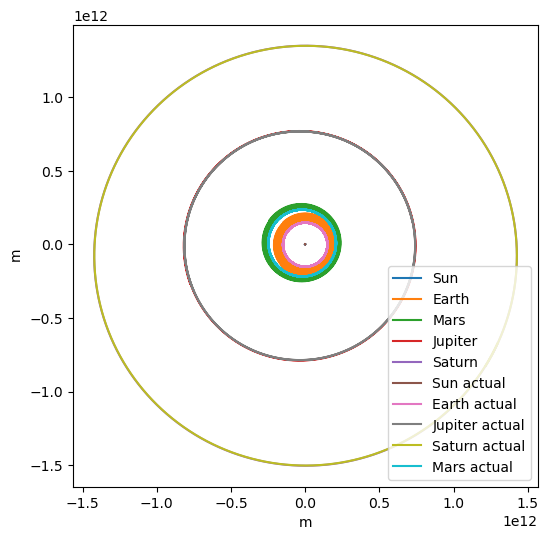

In [68]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
y1 = sun['y'].quantity
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x2 = earth['x'].quantity
y2 = earth['y'].quantity
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x3 = jupiter['x'].quantity
y3 = jupiter['y'].quantity
saturn = Horizons(id='699', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x4 = saturn['x'].quantity
y4 = saturn['y'].quantity
mars = Horizons(id='499', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x5 = mars['x'].quantity
y5 = mars['y'].quantity
fig, ax = plt.subplots(figsize=(6, 6))
for o in run3.objects:
    ax.plot(o['pvt']['p'][:,0],o['pvt']['p'][:,1],label=o['name'])
ax.plot(x1, y1, label='Sun actual')
ax.plot(x2, y2, label='Earth actual') 
ax.plot(x3, y3, label='Jupiter actual')
ax.plot(x4, y4, label='Saturn actual')
ax.plot(x5, y5, label='Mars actual')
ax.legend()

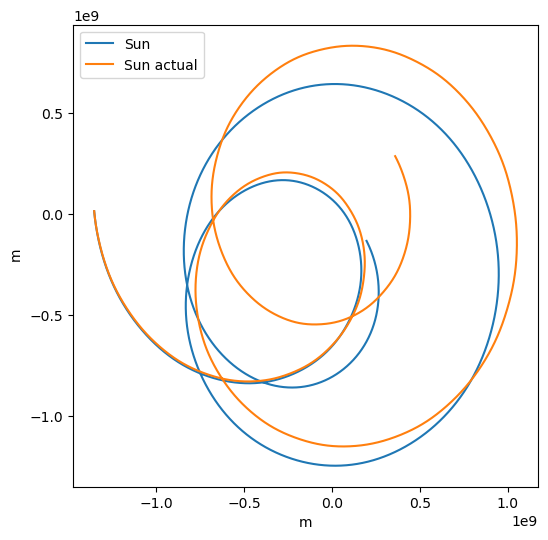

In [71]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
y1 = sun['y'].quantity
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(run3.objects[0]['pvt']['p'][:,0],run3.objects[0]['pvt']['p'][:,1],label=run3.objects[0]['name'])
ax.plot(x1, y1, label='Sun actual')
ax.legend()

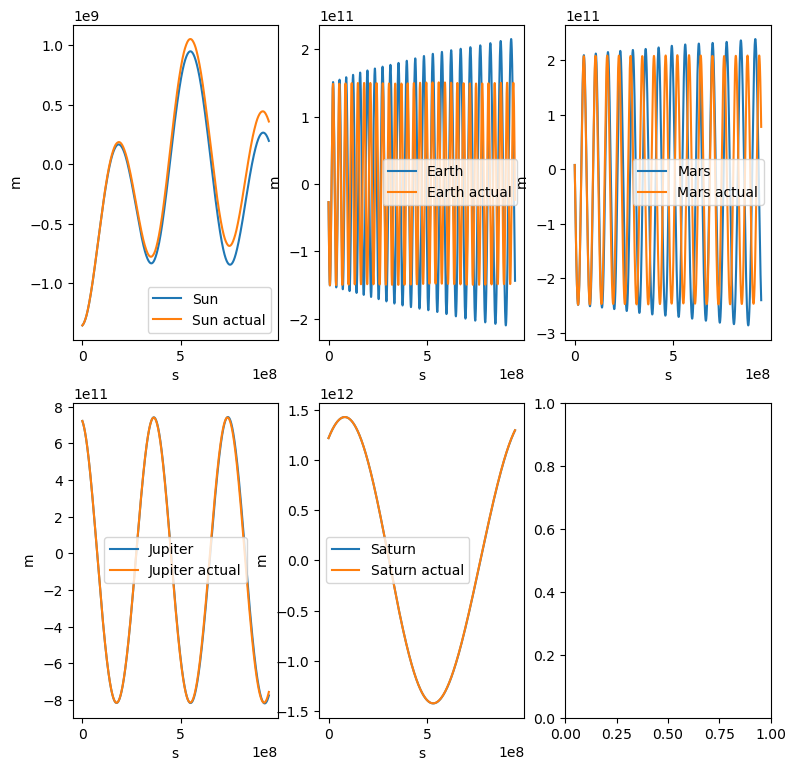

In [73]:
fig, ax = plt.subplots(2, 3, figsize=(9,9))
plt.subplot(231)
plt.plot(run3.objects[0]['pvt']['t'],run3.objects[0]['pvt']['p'][:,0],label=run3.objects[0]['name'])
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
plt.plot(t1, x1, label='Sun actual')
plt.legend()
plt.subplot(232)
plt.plot(run3.objects[1]['pvt']['t'],run3.objects[1]['pvt']['p'][:,0],label=run3.objects[1]['name'])
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x2 = earth['x'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t2, x2, label='Earth actual')
plt.legend()
plt.subplot(233)
plt.plot(run3.objects[2]['pvt']['t'],run3.objects[2]['pvt']['p'][:,0],label=run3.objects[2]['name'])
mars = Horizons(id='499', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x3 = mars['x'].quantity
t3 = mars['datetime_jd'].quantity - jupiter['datetime_jd'].quantity[0]
plt.plot(t3, x3, label='Mars actual')
plt.legend()
plt.subplot(234)
plt.plot(run3.objects[3]['pvt']['t'],run3.objects[3]['pvt']['p'][:,0],label=run3.objects[3]['name'])
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01", 'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x4 = jupiter['x'].quantity
t4 = jupiter['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t4, x4, label='Jupiter actual')
plt.legend()
plt.subplot(235)
plt.plot(run3.objects[4]['pvt']['t'],run3.objects[4]['pvt']['p'][:,0],label=run3.objects[4]['name'])
saturn = Horizons(id='699', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x5 = saturn['x'].quantity
t5 = saturn['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t5, x5, label='Saturn actual')
plt.legend()

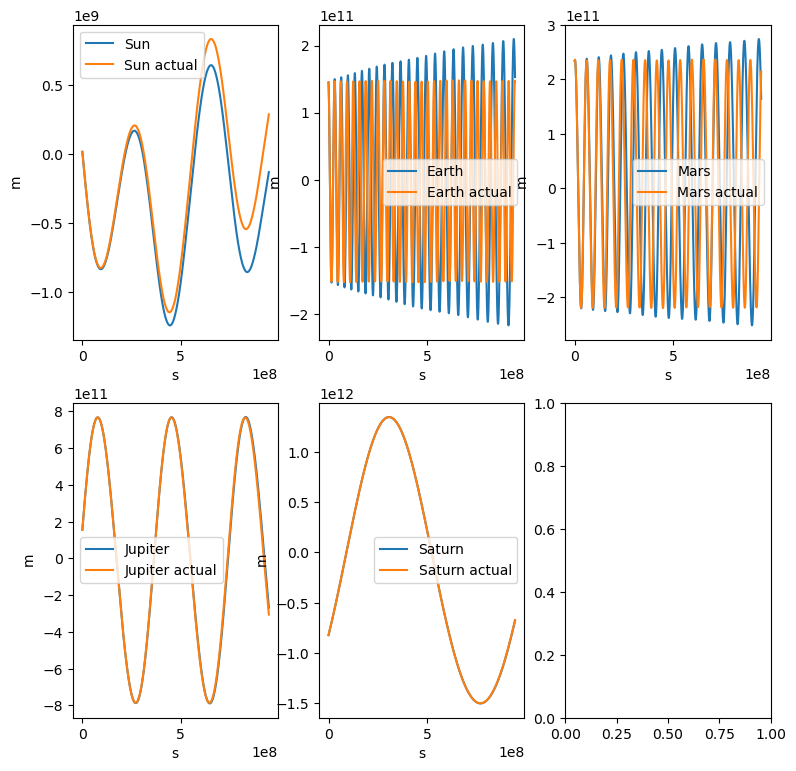

In [74]:
fig, ax = plt.subplots(2, 3, figsize=(9,9))
plt.subplot(231)
plt.plot(run3.objects[0]['pvt']['t'],run3.objects[0]['pvt']['p'][:,1],label=run3.objects[0]['name'])
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y1 = sun['y'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
plt.plot(t1, y1, label='Sun actual')
plt.legend()
plt.subplot(232)
plt.plot(run3.objects[1]['pvt']['t'],run3.objects[1]['pvt']['p'][:,1],label=run3.objects[1]['name'])
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y2 = earth['y'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t2, y2, label='Earth actual')
plt.legend()
plt.subplot(233)
plt.plot(run3.objects[2]['pvt']['t'],run3.objects[2]['pvt']['p'][:,1],label=run3.objects[2]['name'])
mars = Horizons(id='499', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y3 = mars['y'].quantity
t3 = mars['datetime_jd'].quantity - jupiter['datetime_jd'].quantity[0]
plt.plot(t3, y3, label='Mars actual')
plt.legend()
plt.subplot(234)
plt.plot(run3.objects[3]['pvt']['t'],run3.objects[3]['pvt']['p'][:,1],label=run3.objects[3]['name'])
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01", 'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y4 = jupiter['y'].quantity
t4 = jupiter['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t4, y4, label='Jupiter actual')
plt.legend()
plt.subplot(235)
plt.plot(run3.objects[4]['pvt']['t'],run3.objects[4]['pvt']['p'][:,1],label=run3.objects[4]['name'])
saturn = Horizons(id='699', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y5 = saturn['y'].quantity
t5 = saturn['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t5, y5, label='Saturn actual')
plt.legend()

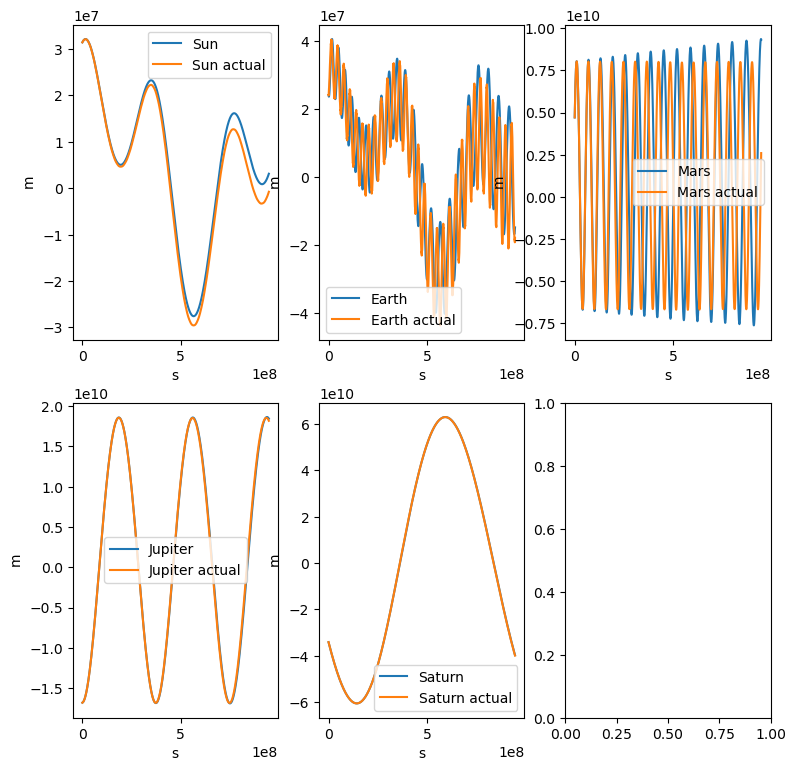

In [75]:
fig, ax = plt.subplots(2, 3, figsize=(9,9))
plt.subplot(231)
plt.plot(run3.objects[0]['pvt']['t'],run3.objects[0]['pvt']['p'][:,2],label=run3.objects[0]['name'])
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z1 = sun['z'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
plt.plot(t1, z1, label='Sun actual')
plt.legend()
plt.subplot(232)
plt.plot(run3.objects[1]['pvt']['t'],run3.objects[1]['pvt']['p'][:,2],label=run3.objects[1]['name'])
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z2 = earth['z'].quantity
t2 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t2, z2, label='Earth actual')
plt.legend()
plt.subplot(233)
plt.plot(run3.objects[2]['pvt']['t'],run3.objects[2]['pvt']['p'][:,2],label=run3.objects[2]['name'])
mars = Horizons(id='499', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z3 = mars['z'].quantity
t3 = mars['datetime_jd'].quantity - jupiter['datetime_jd'].quantity[0]
plt.plot(t3, z3, label='Mars actual')
plt.legend()
plt.subplot(234)
plt.plot(run3.objects[3]['pvt']['t'],run3.objects[3]['pvt']['p'][:,2],label=run3.objects[3]['name'])
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01", 'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z4 = jupiter['z'].quantity
t4 = jupiter['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t4, z4, label='Jupiter actual')
plt.legend()
plt.subplot(235)
plt.plot(run3.objects[4]['pvt']['t'],run3.objects[4]['pvt']['p'][:,2],label=run3.objects[4]['name'])
saturn = Horizons(id='699', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z5 = saturn['z'].quantity
t5 = saturn['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t5, z5, label='Saturn actual')
plt.legend()

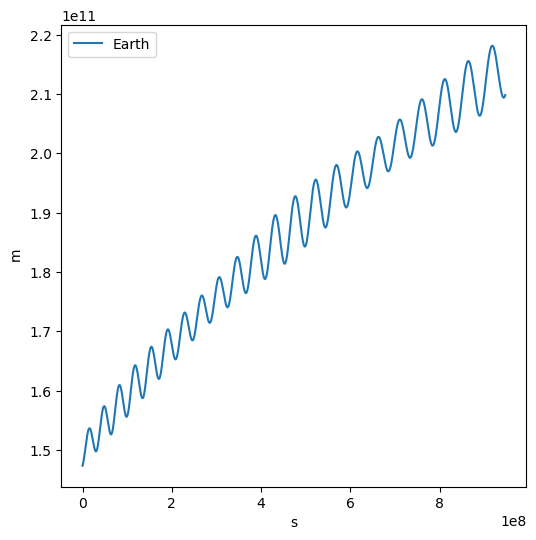

In [124]:
fig, ax = plt.subplots(figsize=(6, 6))
#ax.plot(math.sqrt((run3.objects[1]['pvt']['p'][:,0]**2)+(run3.objects[1]['pvt']['p'][:,1]**2)+(run3.objects[1]['pvt']['p'][:,2]**2)),run3.objects[1]['pvt']['t'],label=run3.objects[0]['name'])
ax.plot(run3.objects[1]['pvt']['t'], np.sqrt(np.sum(run3.objects[1]['pvt']['p']**2,axis=1)),label=run3.objects[1]['name'])
ax.legend()

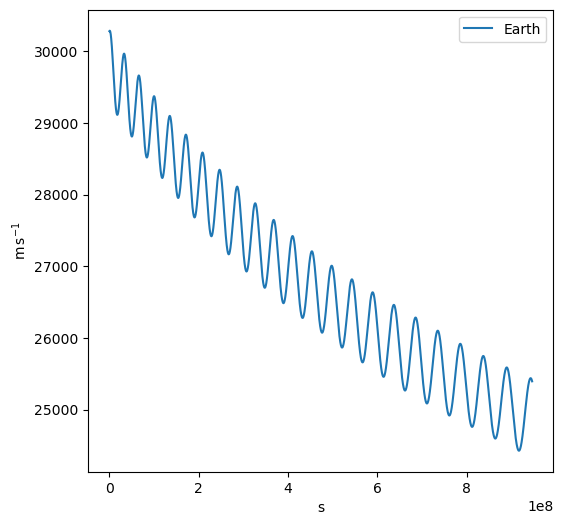

In [125]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(run3.objects[1]['pvt']['t'], np.sqrt(np.sum(run3.objects[1]['pvt']['v']**2,axis=1)),label=run3.objects[1]['name'])
ax.legend()

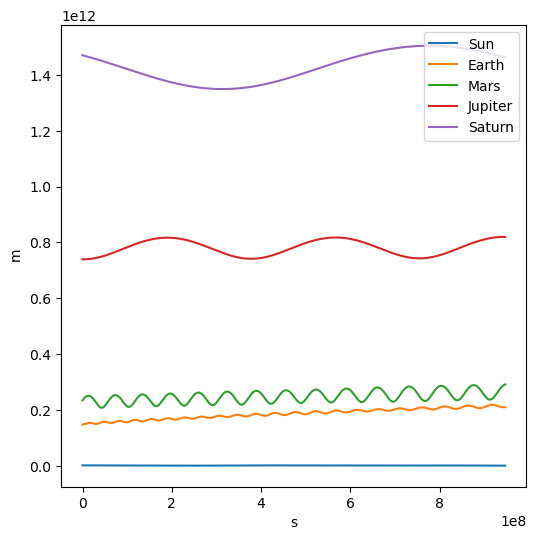

In [126]:
fig, ax = plt.subplots(figsize=(6,6))
for o in run3.objects:
    ax.plot(o['pvt']['t'], np.sqrt(np.sum(o['pvt']['p']**2,axis=1)),label=o['name'])
ax.legend()

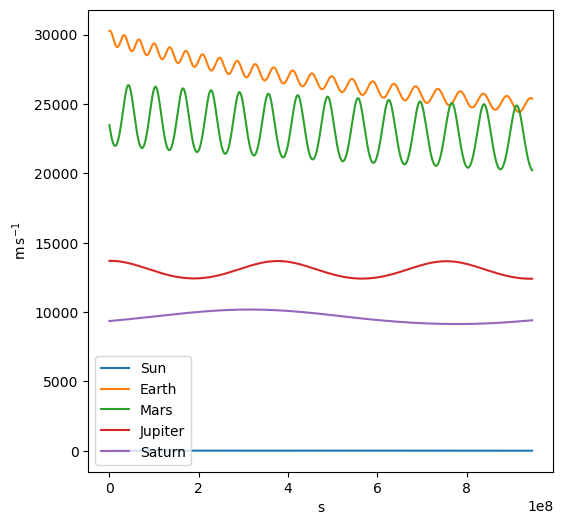

In [127]:
fig, ax = plt.subplots(figsize=(6,6))
for o in run3.objects:
    ax.plot(o['pvt']['t'], np.sqrt(np.sum(o['pvt']['v']**2,axis=1)),label=o['name'])
ax.legend()

In [105]:
run4 = SimRun(1*u.d, 60*u.year)

In [106]:
run4.add_object('Sun', sun['x'].quantity[0], sun['y'].quantity[0], sun['z'].quantity[0], sun['vx'].quantity[0], sun['vy'].quantity[0], sun['vz'].quantity[0], 1.98840987e+30*u.kg, 695508*u.au)
run4.add_object('Jupiter', jupiter['x'].quantity[0], jupiter['y'].quantity[0], jupiter['z'].quantity[0], jupiter['vx'].quantity[0], jupiter['vy'].quantity[0], jupiter['vz'].quantity[0],1.898187e+27*u.kg, 6.9911e+7*u.au)

In [107]:
run4.run()

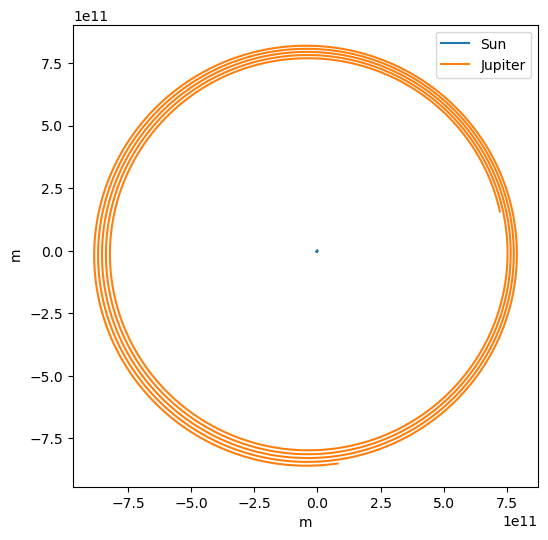

In [108]:
fig, ax = plt.subplots(figsize=(6, 6))
for o in run4.objects:
    ax.plot(o['pvt']['p'][:,0],o['pvt']['p'][:,1],label=o['name'])

ax.legend()

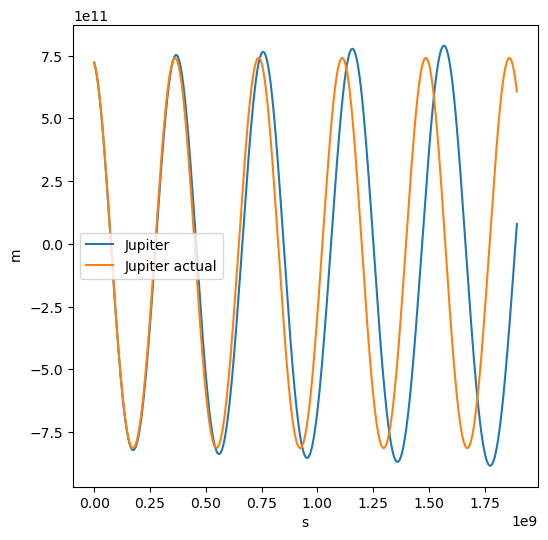

In [111]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(run4.objects[1]['pvt']['t'],run4.objects[1]['pvt']['p'][:,0], label=run4.objects[1]['name'])
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01",'stop':"2082-12-31",'step':'1d'}, id_type=None).vectors()
x = jupiter['x'].quantity
t = jupiter['datetime_jd'].quantity - jupiter['datetime_jd'].quantity[0]
ax.plot(t, x, label='Jupiter actual')
ax.legend()

In [85]:
run5 = SimRun(0.1*u.d, 30*u.year)

In [86]:
venus = Horizons(id='299', location="@SSB", epochs=Time("2023-01-01").jd, id_type=None).vectors()

In [87]:
run5.add_object('Sun', sun['x'].quantity[0], sun['y'].quantity[0], sun['z'].quantity[0], sun['vx'].quantity[0], sun['vy'].quantity[0], sun['vz'].quantity[0], 1.98840987e+30*u.kg, 695508*u.au)
run5.add_object('Venus', venus['x'].quantity[0], venus['y'].quantity[0], venus['z'].quantity[0], venus['vx'].quantity[0], venus['vy'].quantity[0], venus['vz'].quantity[0], 4.8675e+24*u.kg, 6.052e+6*u.au)
run5.add_object('Earth', earth['x'].quantity[0], earth['y'].quantity[0], earth['z'].quantity[0], earth['vx'].quantity[0], earth['vy'].quantity[0], earth['vz'].quantity[0], 5.97216787e+24*u.kg, 6.371e+6*u.au)
run5.add_object('Mars', mars['x'].quantity[0], mars['y'].quantity[0], mars['z'].quantity[0], mars['vx'].quantity[0], mars['vy'].quantity[0], mars['vz'].quantity[0], 6.4171e+23*u.kg, 3.3895e+6*u.au)
run5.add_object('Jupiter', jupiter['x'].quantity[0], jupiter['y'].quantity[0], jupiter['z'].quantity[0], jupiter['vx'].quantity[0], jupiter['vy'].quantity[0], jupiter['vz'].quantity[0],1.898187e+27*u.kg, 6.9911e+7*u.au)
run5.add_object('Saturn', saturn['x'].quantity[0], saturn['y'].quantity[0], saturn['z'].quantity[0], saturn['vx'].quantity[0], saturn['vy'].quantity[0], saturn['vz'].quantity[0], 5.68317e+26*u.kg, 5.8232e+7*u.au)

In [88]:
run5.run()

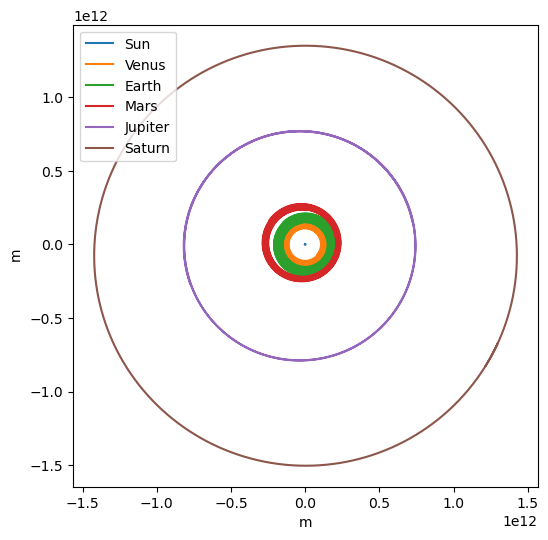

In [90]:
fig, ax = plt.subplots(figsize=(6, 6))
for o in run5.objects:
    ax.plot(o['pvt']['p'][:,0],o['pvt']['p'][:,1],label=o['name'])
ax.legend()

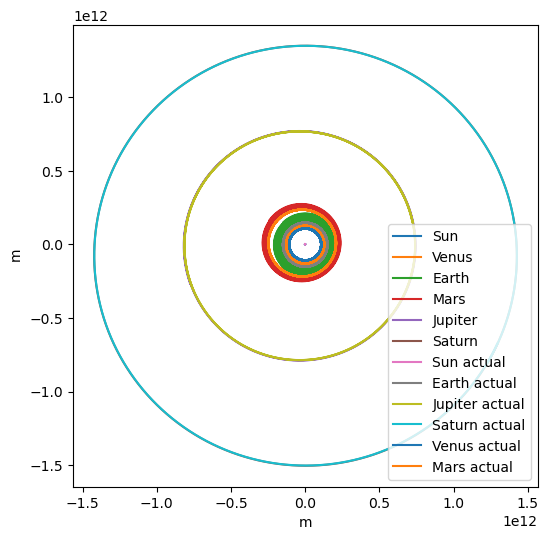

In [93]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
y1 = sun['y'].quantity
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x2 = earth['x'].quantity
y2 = earth['y'].quantity
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x3 = jupiter['x'].quantity
y3 = jupiter['y'].quantity
saturn = Horizons(id='699', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x4 = saturn['x'].quantity
y4 = saturn['y'].quantity
mars = Horizons(id='499', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x5 = mars['x'].quantity
y5 = mars['y'].quantity
venus = Horizons(id='299', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x6 = venus['x'].quantity
y6 = venus['y'].quantity
fig, ax = plt.subplots(figsize=(6, 6))
for o in run5.objects:
    ax.plot(o['pvt']['p'][:,0],o['pvt']['p'][:,1],label=o['name'])
ax.plot(x1, y1, label='Sun actual')
ax.plot(x2, y2, label='Earth actual') 
ax.plot(x3, y3, label='Jupiter actual')
ax.plot(x4, y4, label='Saturn actual')
ax.plot(x6, y6, label='Venus actual')
ax.plot(x5, y5, label='Mars actual')
ax.legend()

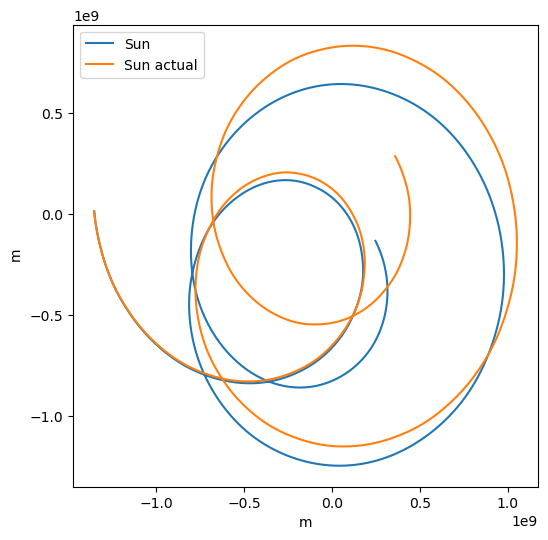

In [94]:
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
y1 = sun['y'].quantity
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(run5.objects[0]['pvt']['p'][:,0],run3.objects[0]['pvt']['p'][:,1],label=run3.objects[0]['name'])
ax.plot(x1, y1, label='Sun actual')
ax.legend()

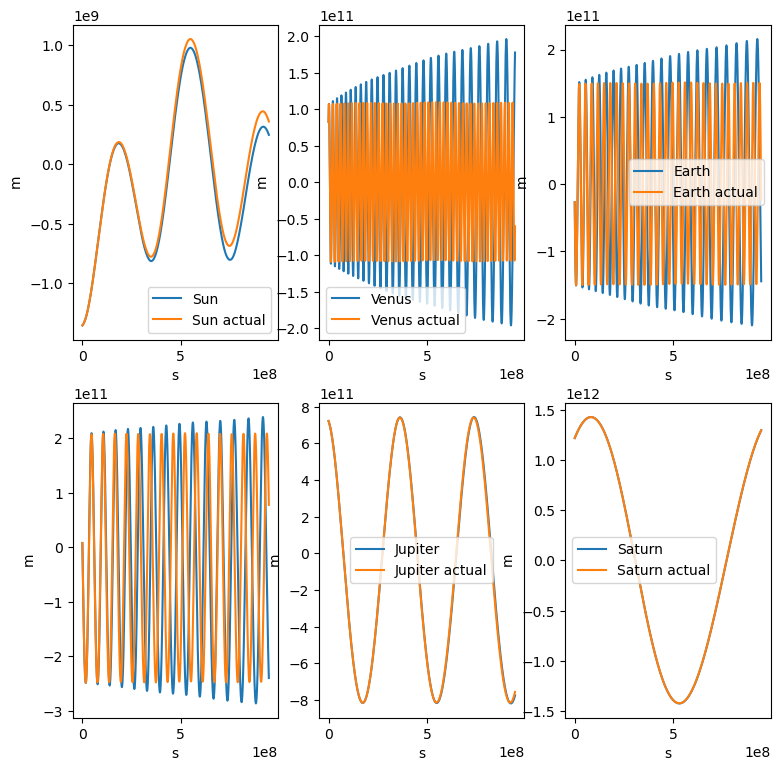

In [104]:
fig, ax = plt.subplots(2, 3, figsize=(9,9))
plt.subplot(231)
plt.plot(run5.objects[0]['pvt']['t'],run5.objects[0]['pvt']['p'][:,0],label=run5.objects[0]['name'])
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x1 = sun['x'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
plt.plot(t1, x1, label='Sun actual')
plt.legend()
plt.subplot(232)
plt.plot(run5.objects[1]['pvt']['t'],run5.objects[1]['pvt']['p'][:,0],label=run5.objects[1]['name'])
venus = Horizons(id='299', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x2 = venus['x'].quantity
t2 = venus['datetime_jd'].quantity - mars['datetime_jd'].quantity[0]
plt.plot(t2, x2, label='Venus actual')
plt.legend()
plt.subplot(233)
plt.plot(run5.objects[2]['pvt']['t'],run5.objects[2]['pvt']['p'][:,0],label=run5.objects[2]['name'])
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x3 = earth['x'].quantity
t3 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t3, x3, label='Earth actual')
plt.legend()
plt.subplot(234)
plt.plot(run5.objects[3]['pvt']['t'],run5.objects[3]['pvt']['p'][:,0],label=run5.objects[3]['name'])
mars = Horizons(id='499', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x4 = mars['x'].quantity
t4 = mars['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t4, x4, label='Mars actual')
plt.legend
plt.subplot(235)
plt.plot(run5.objects[4]['pvt']['t'],run5.objects[4]['pvt']['p'][:,0],label=run5.objects[4]['name'])
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01", 'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x5 = jupiter['x'].quantity
t5 = jupiter['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t5, x5, label='Jupiter actual')
plt.legend()
plt.subplot(236)
plt.plot(run5.objects[5]['pvt']['t'],run5.objects[5]['pvt']['p'][:,0],label=run5.objects[5]['name'])
saturn = Horizons(id='699', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
x6 = saturn['x'].quantity
t6 = saturn['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t6, x6, label='Saturn actual')
plt.legend()

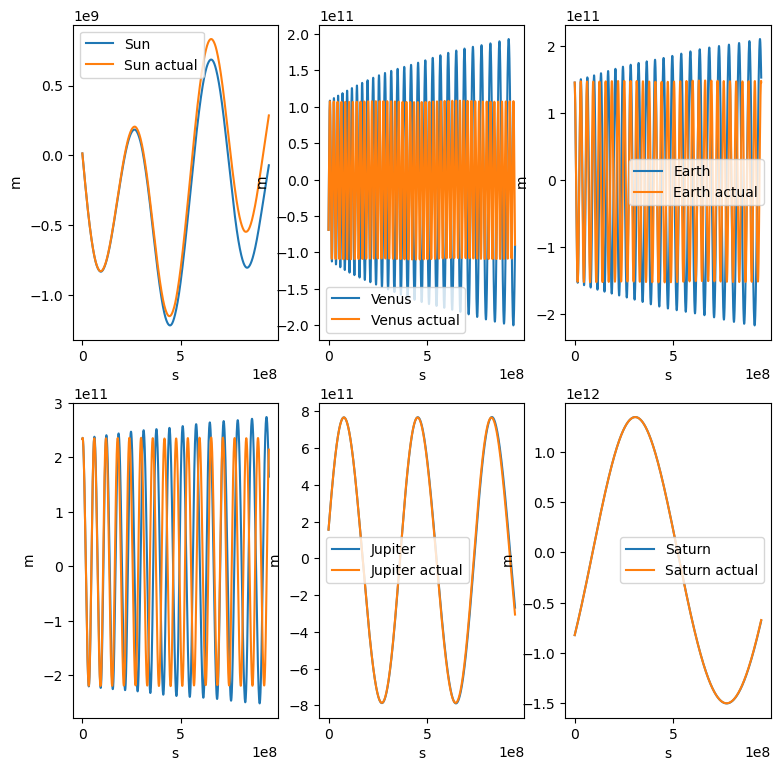

In [113]:
fig, ax = plt.subplots(2, 3, figsize=(9,9))
plt.subplot(231)
plt.plot(run5.objects[0]['pvt']['t'],run5.objects[0]['pvt']['p'][:,1],label=run5.objects[0]['name'])
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y1 = sun['y'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
plt.plot(t1, y1, label='Sun actual')
plt.legend()
plt.subplot(232)
plt.plot(run5.objects[1]['pvt']['t'],run5.objects[1]['pvt']['p'][:,1],label=run5.objects[1]['name'])
venus = Horizons(id='299', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y2 = venus['y'].quantity
t2 = venus['datetime_jd'].quantity - mars['datetime_jd'].quantity[0]
plt.plot(t2, y2, label='Venus actual')
plt.legend()
plt.subplot(233)
plt.plot(run5.objects[2]['pvt']['t'],run5.objects[2]['pvt']['p'][:,1],label=run5.objects[2]['name'])
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y3 = earth['y'].quantity
t3 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t3, y3, label='Earth actual')
plt.legend()
plt.subplot(234)
plt.plot(run5.objects[3]['pvt']['t'],run5.objects[3]['pvt']['p'][:,1],label=run5.objects[3]['name'])
mars = Horizons(id='499', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y4 = mars['y'].quantity
t4 = mars['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t4, y4, label='Mars actual')
plt.legend
plt.subplot(235)
plt.plot(run5.objects[4]['pvt']['t'],run5.objects[4]['pvt']['p'][:,1],label=run5.objects[4]['name'])
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01", 'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y5 = jupiter['y'].quantity
t5 = jupiter['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t5, y5, label='Jupiter actual')
plt.legend()
plt.subplot(236)
plt.plot(run5.objects[5]['pvt']['t'],run5.objects[5]['pvt']['p'][:,1],label=run5.objects[5]['name'])
saturn = Horizons(id='699', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
y6 = saturn['y'].quantity
t6 = saturn['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t6, y6, label='Saturn actual')
plt.legend()

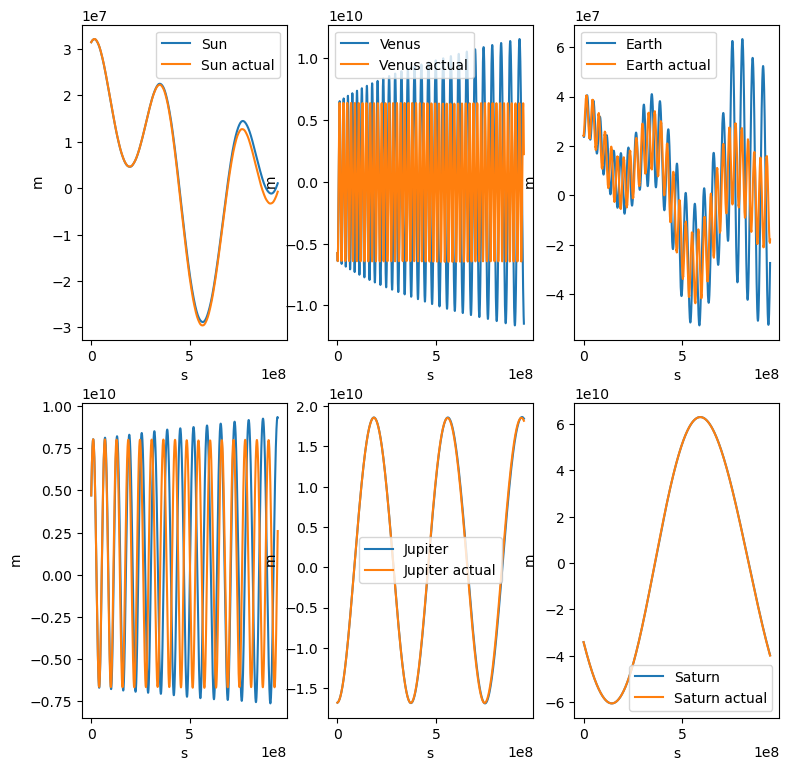

In [115]:
fig, ax = plt.subplots(2, 3, figsize=(9,9))
plt.subplot(231)
plt.plot(run5.objects[0]['pvt']['t'],run5.objects[0]['pvt']['p'][:,2],label=run5.objects[0]['name'])
sun = Horizons(id='sun', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z1 = sun['z'].quantity
t1 = sun['datetime_jd'].quantity - sun['datetime_jd'].quantity[0]
plt.plot(t1, z1, label='Sun actual')
plt.legend()
plt.subplot(232)
plt.plot(run5.objects[1]['pvt']['t'],run5.objects[1]['pvt']['p'][:,2],label=run5.objects[1]['name'])
venus = Horizons(id='299', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z2 = venus['z'].quantity
t2 = venus['datetime_jd'].quantity - mars['datetime_jd'].quantity[0]
plt.plot(t2, z2, label='Venus actual')
plt.legend()
plt.subplot(233)
plt.plot(run5.objects[2]['pvt']['t'],run5.objects[2]['pvt']['p'][:,2],label=run5.objects[2]['name'])
earth = Horizons(id='399', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z3 = earth['z'].quantity
t3 = earth['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t3, z3, label='Earth actual')
plt.legend()
plt.subplot(234)
plt.plot(run5.objects[3]['pvt']['t'],run5.objects[3]['pvt']['p'][:,2],label=run5.objects[3]['name'])
mars = Horizons(id='499', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z4 = mars['z'].quantity
t4 = mars['datetime_jd'].quantity - earth['datetime_jd'].quantity[0]
plt.plot(t4, z4, label='Mars actual')
plt.legend
plt.subplot(235)
plt.plot(run5.objects[4]['pvt']['t'],run5.objects[4]['pvt']['p'][:,2],label=run5.objects[4]['name'])
jupiter = Horizons(id='599', location="@SSB", epochs={'start':"2023-01-01", 'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z5 = jupiter['z'].quantity
t5 = jupiter['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t5, z5, label='Jupiter actual')
plt.legend()
plt.subplot(236)
plt.plot(run5.objects[5]['pvt']['t'],run5.objects[5]['pvt']['p'][:,2],label=run5.objects[5]['name'])
saturn = Horizons(id='699', location="@SSB", epochs={'start':"2023-01-01",'stop':"2052-12-31",'step':'1d'}, id_type=None).vectors()
z6 = saturn['z'].quantity
t6 = saturn['datetime_jd'].quantity - saturn['datetime_jd'].quantity[0]
plt.plot(t6, z6, label='Saturn actual')
plt.legend()

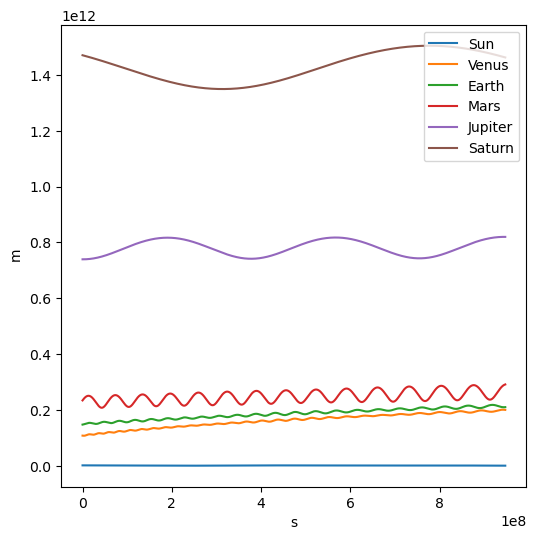

In [128]:
fig, ax = plt.subplots(figsize=(6,6))
for o in run5.objects:
    ax.plot(o['pvt']['t'], np.sqrt(np.sum(o['pvt']['p']**2,axis=1)),label=o['name'])
ax.legend()

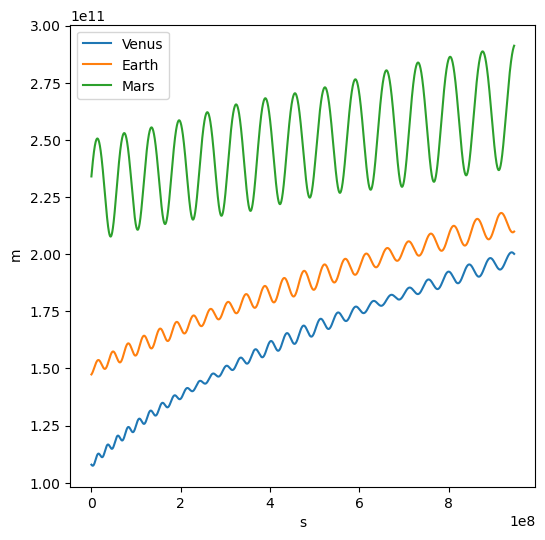

In [129]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(run5.objects[1]['pvt']['t'], np.sqrt(np.sum(run5.objects[1]['pvt']['p']**2,axis=1)),label=run5.objects[1]['name'])
ax.plot(run5.objects[2]['pvt']['t'], np.sqrt(np.sum(run5.objects[2]['pvt']['p']**2,axis=1)),label=run5.objects[2]['name'])
ax.plot(run5.objects[3]['pvt']['t'], np.sqrt(np.sum(run5.objects[3]['pvt']['p']**2,axis=1)),label=run5.objects[3]['name'])
ax.legend()

In [138]:
run6 = SimRun(0.1*u.d, 30*u.year)

In [139]:
mercury = Horizons(id='199', location="@SSB", epochs=Time("2023-01-01").jd, id_type=None).vectors()

In [140]:
run6.add_object('Sun', sun['x'].quantity[0], sun['y'].quantity[0], sun['z'].quantity[0], sun['vx'].quantity[0], sun['vy'].quantity[0], sun['vz'].quantity[0], 1.98840987e+30*u.kg, 695508*u.au)
run6.add_object('Mercury', mercury['x'].quantity[0], mercury['y'].quantity[0], mercury['z'].quantity[0], mercury['vx'].quantity[0], mercury['vy'].quantity[0], mercury['vz'].quantity[0], 3.3011e+23*u.kg, 2.4394e+6*u.au)
run6.add_object('Venus', venus['x'].quantity[0], venus['y'].quantity[0], venus['z'].quantity[0], venus['vx'].quantity[0], venus['vy'].quantity[0], venus['vz'].quantity[0], 4.8675e+24*u.kg, 6.052e+6*u.au)
run6.add_object('Earth', earth['x'].quantity[0], earth['y'].quantity[0], earth['z'].quantity[0], earth['vx'].quantity[0], earth['vy'].quantity[0], earth['vz'].quantity[0], 5.97216787e+24*u.kg, 6.371e+6*u.au)
run6.add_object('Mars', mars['x'].quantity[0], mars['y'].quantity[0], mars['z'].quantity[0], mars['vx'].quantity[0], mars['vy'].quantity[0], mars['vz'].quantity[0], 6.4171e+23*u.kg, 3.3895e+6*u.au)
run6.add_object('Jupiter', jupiter['x'].quantity[0], jupiter['y'].quantity[0], jupiter['z'].quantity[0], jupiter['vx'].quantity[0], jupiter['vy'].quantity[0], jupiter['vz'].quantity[0],1.898187e+27*u.kg, 6.9911e+7*u.au)
run6.add_object('Saturn', saturn['x'].quantity[0], saturn['y'].quantity[0], saturn['z'].quantity[0], saturn['vx'].quantity[0], saturn['vy'].quantity[0], saturn['vz'].quantity[0], 5.68317e+26*u.kg, 5.8232e+7*u.au)

In [141]:
run6.run()

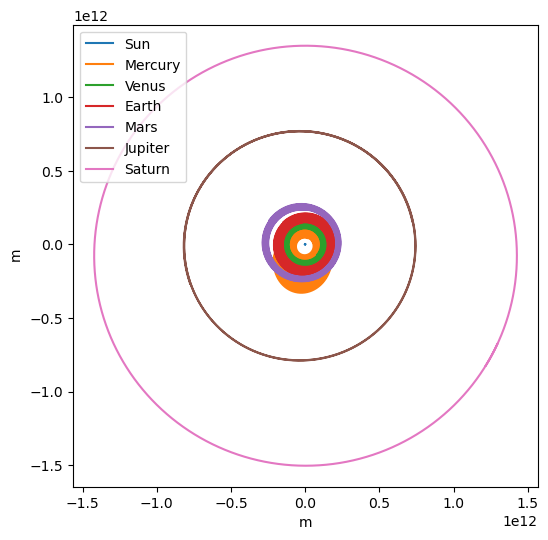

In [143]:
fig, ax = plt.subplots(figsize=(6, 6))
for o in run6.objects:
    ax.plot(o['pvt']['p'][:,0],o['pvt']['p'][:,1],label=o['name'])
ax.legend()

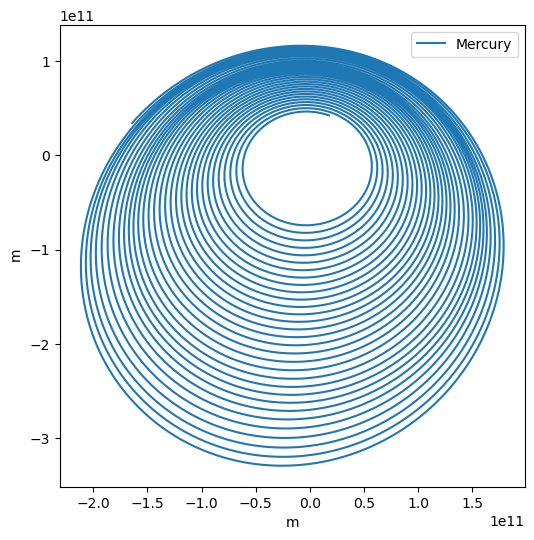

In [145]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(run6.objects[1]['pvt']['p'][:,0], run6.objects[1]['pvt']['p'][:,1],label=run6.objects[1]['name'])
ax.legend()